**Question 1**

In [1]:
a <- rnorm(999,0,1)
b = 2.5*a + 1 + rnorm(999, 0, 3) # b = 2.5*a + 1 + normal error term
data <- data.frame(a, b)
lm_data <- lm(b ~ a, data = data)
summary(lm_data)


Call:
lm(formula = b ~ a, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2548 -2.0701  0.0363  2.0550  8.5877 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.86793    0.09570   9.069   <2e-16 ***
a            2.53599    0.09262  27.380   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.024 on 997 degrees of freedom
Multiple R-squared:  0.4292,	Adjusted R-squared:  0.4286 
F-statistic: 749.6 on 1 and 997 DF,  p-value: < 2.2e-16


In [3]:
#adding outlier to change slope to negative
data2 <- rbind(data, c(-50,100))
lm_data2 <- lm(b ~ a, data = data2)
summary(lm_data2)


Call:
lm(formula = b ~ a, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.861  -3.194  -0.064   2.999  67.487 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.99638    0.15627   6.376 2.78e-10 ***
a           -0.63034    0.08275  -7.617 5.99e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.941 on 998 degrees of freedom
Multiple R-squared:  0.05495,	Adjusted R-squared:  0.054 
F-statistic: 58.03 on 1 and 998 DF,  p-value: 5.994e-14


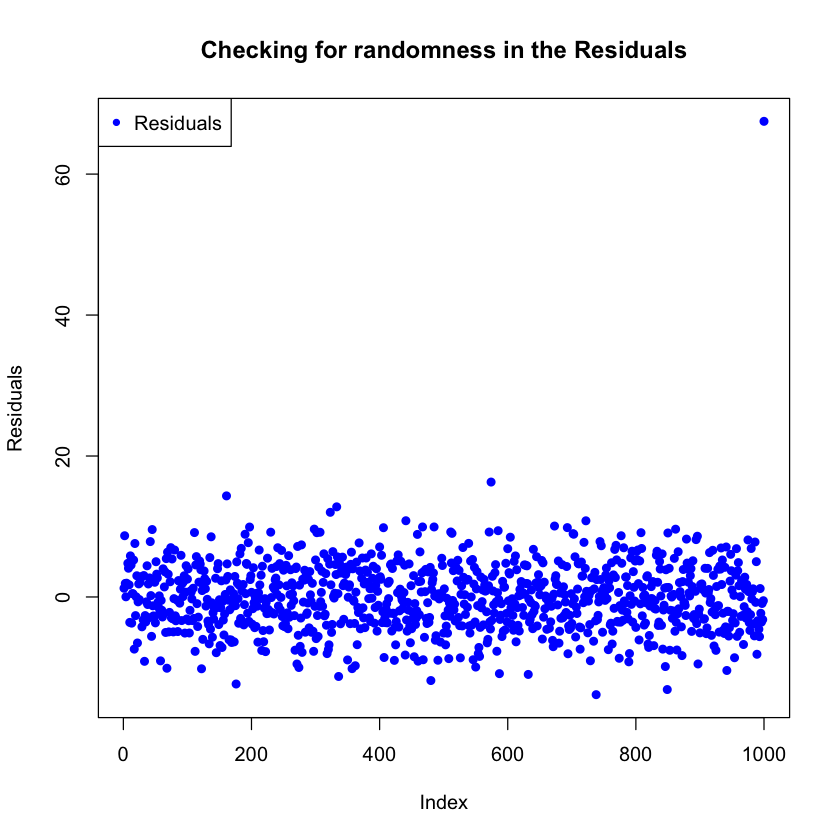

In [4]:
#plotting the residuals to check for randomness
plot(lm_data2$residuals, main = "Checking for randomness in the Residuals", pch = 16, col = "blue",ylab="Residuals")
legend("topleft", legend=c("Residuals"), 
       col=c("blue"), pch=20, cex=1)

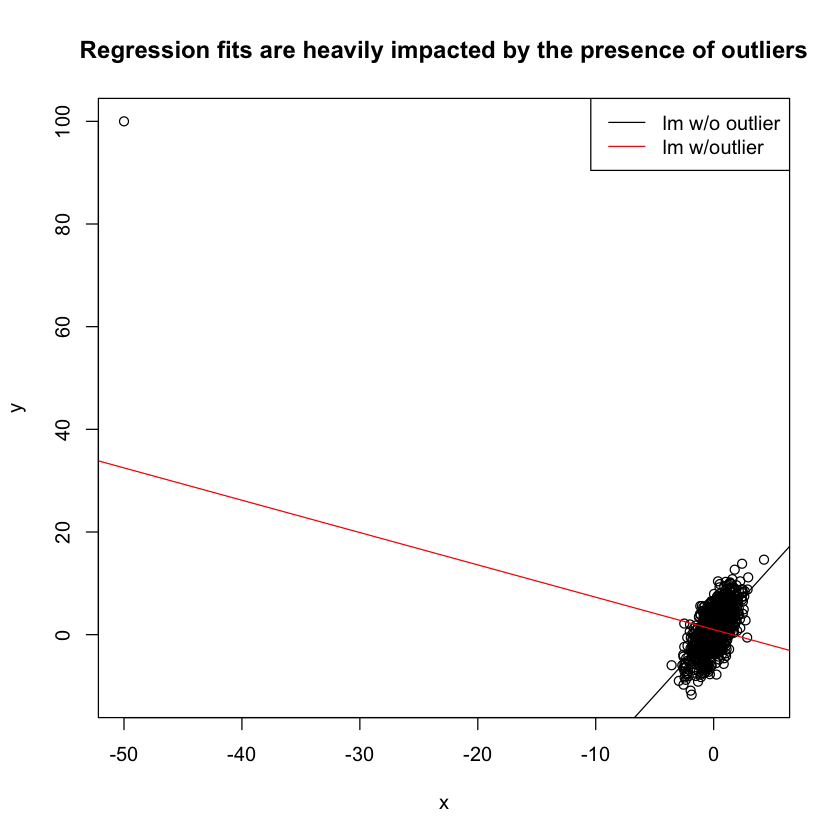

In [8]:
plot(data2, xlab = "x", ylab = "y", main = "Regression fits are heavily impacted by the presence of outliers")
abline(lm_data)
abline(lm_data2, col="red")
legend("topright", legend=c("lm w/o outlier" ,"lm w/outlier"),
       col=c("black", "red"), lty=1, cex=1)

**Question 2**

In [49]:
library(Matching)
library(arm)
library(dplyr)
data(lalonde)

In [50]:
new_lalonde <- lalonde%>%filter(treat!=1)
lm.lalonde <- lm(re78 ~ age + educ + re74 + re75 + educ * re74 + educ * re75 + age *
       re74 + age * re75 + re74 * re75,
     data = new_lalonde)
summary(lm.lalonde)


Call:
lm(formula = re78 ~ age + educ + re74 + re75 + educ * re74 + 
    educ * re75 + age * re74 + age * re75 + re74 * re75, data = new_lalonde)

Residuals:
   Min     1Q Median     3Q    Max 
 -7264  -4148  -1590   3014  33846 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  3.686e+03  2.630e+03   1.401    0.162
age          2.216e+00  5.206e+01   0.043    0.966
educ         3.907e+01  2.292e+02   0.170    0.865
re74        -1.552e-02  4.790e-01  -0.032    0.974
re75         7.845e-01  1.878e+00   0.418    0.677
educ:re74    3.441e-02  6.671e-02   0.516    0.606
educ:re75   -7.204e-02  1.341e-01  -0.537    0.592
age:re74    -5.705e-03  2.783e-02  -0.205    0.838
age:re75     9.309e-03  4.212e-02   0.221    0.825
re74:re75   -2.294e-05  1.413e-05  -1.623    0.106

Residual standard error: 5511 on 250 degrees of freedom
Multiple R-squared:  0.02514,	Adjusted R-squared:  -0.009957 
F-statistic: 0.7163 on 9 and 250 DF,  p-value: 0.6938


In [51]:
simulation_lalonde <- sim(lm.lalonde, n.sims = 10000) #to run simulation

**Part A**

In [76]:
simulated.ys_median.1 <- matrix(NA, nrow = 10000, ncol = 39)

In [78]:
re74_median.1 <- median(new_lalonde$re74)
re75_median.1 <- median(new_lalonde$re75)
educ_median.1 <- median(new_lalonde$educ)
for (age in (17:55)) {
  Xs.1 <- c(1, age, educ_median.1, re74_median.1, re75_median.1, educ_median.1*re74_median.1,
          educ_median.1*re75_median.1, age*re74_median.1, age*re75_median.1, re74_median.1*re75_median.1)
  for (i in 1:10000) {
    simulated.ys_median.1[i, age + 1 - min(new_lalonde$age)] <- sum(Xs.1*simulation_lalonde@coef[i,])
  }
}

storage_1 <- 0
for (age in 1:39) {
    storage_1[age] <- median(simulated.ys_median.1[age, ])
    }

median_confint.1 <- apply(simulated.ys_median.1, MARGIN = 2, quantile, probs = c(0.025, 0.975))
median_table.1 <- data.frame( "Age"= 17:55, "Median"=storage_1, "Lower Quartile_Median" = median_confint.1[1, ], "Upper Quartile_Median" = median_confint.1[2, ])
median_table.1



Age,Median,Lower.Quartile_Median,Upper.Quartile_Median
17,4290.431,2966.562,5257.639
18,4000.063,3044.739,5194.304
19,4366.493,3124.796,5126.138
20,4619.554,3191.345,5068.367
21,5693.097,3252.990,5019.055
22,4834.486,3307.211,4976.599
23,4420.778,3347.395,4941.726
24,4748.828,3375.942,4913.544
25,4032.068,3381.386,4903.216
26,4651.852,3380.916,4904.685


**Part B**

In [65]:
simulated.ys_q75.1 <- matrix(NA, nrow = 10000, ncol = 39)

In [66]:
educ_q75.1 <- quantile(new_lalonde$educ, 0.75)
re74_q75.1 <- quantile(new_lalonde$re74, 0.75)
re75_q75.1 <- quantile(new_lalonde$re75, 0.75)

for (age in (17:55)) {
  Xs_q75.1 <- c(1, age, educ_q75.1, re74_q75.1, re75_q75.1, educ_q75.1*re74_q75.1,
          educ_q75.1*re75_q75.1, age*re74_q75.1, age*re75_q75.1, re74_q75.1*re75_q75.1)
  for (i in 1:10000) {
    simulated.ys_q75.1[i, age + 1 - min(new_lalonde$age)] <- sum(Xs_q75.1*simulation_lalonde@coef[i,])
  }
}

storage_2 <- 0
for (age in 1:39) {
    storage_2[age] <- median(simulated.ys_q75.1[age, ])
    }

coinfint_q75.1 <- apply(simulated.ys_q75.1, MARGIN = 2, quantile, probs = c(0.025, 0.975))
table_q75.1 <- data.frame("Age"= 17:55, "Median" = storage_2, "Lower Quartile" = coinfint_q75.1[1, ], "Upper Quartile" = coinfint_q75.1[2, ])
table_q75.1



Age,Median,Lower.Quartile,Upper.Quartile
17,4306.130,3060.866,5494.397
18,4477.172,3149.328,5431.870
19,5044.870,3223.439,5374.617
20,4489.810,3294.456,5315.026
21,5605.834,3364.422,5270.547
22,4493.371,3413.328,5236.383
23,4671.647,3462.284,5205.506
24,5284.061,3495.979,5184.702
25,4152.613,3517.304,5176.210
26,4868.906,3527.305,5185.006


**Part C**

In [69]:
simulated.ys_median <- matrix(NA, nrow = 10000, ncol = 39)

In [70]:
re74_median <- median(new_lalonde$re74)
re75_median <- median(new_lalonde$re75)
educ_median <- median(new_lalonde$educ)
for (age in (17:55)) {
  Xs <- c(1, age, educ_median, re74_median, re75_median, educ_median*re74_median,
          educ_median*re75_median, age*re74_median, age*re75_median, re74_median*re75_median)
  for (i in 1:10000) {
    simulated.ys_median[i, age + 1 - min(new_lalonde$age)] <- sum(Xs*simulation_lalonde@coef[i,]) +
            rnorm(1, 0, simulation_lalonde@sigma[i])
  }
}

storage_3 <- 0
for (age in 1:39) {
    storage_3[age] <- median(simulated.ys_median[age, ])
    }

median_confint <- apply(simulated.ys_median, MARGIN = 2, quantile, probs = c(0.025, 0.975))
median_table <- data.frame( "Age"= 17:55, "Median"=storage_3, "Lower Quartile_Median" = median_confint[1, ], "Upper Quartile_Median" = median_confint[2, ])
median_table



Age,Median,Lower.Quartile_Median,Upper.Quartile_Median
17,4899.815,-6745.662,15187.62
18,3768.843,-7090.567,15134.13
19,5097.896,-6698.972,14877.65
20,3698.584,-6803.416,15174.24
21,5237.257,-6963.978,15093.18
22,6781.144,-6684.871,15027.81
23,4797.538,-6710.497,15014.63
24,6929.153,-6710.690,15107.79
25,2763.786,-6809.680,15152.37
26,3809.201,-6833.194,15116.02


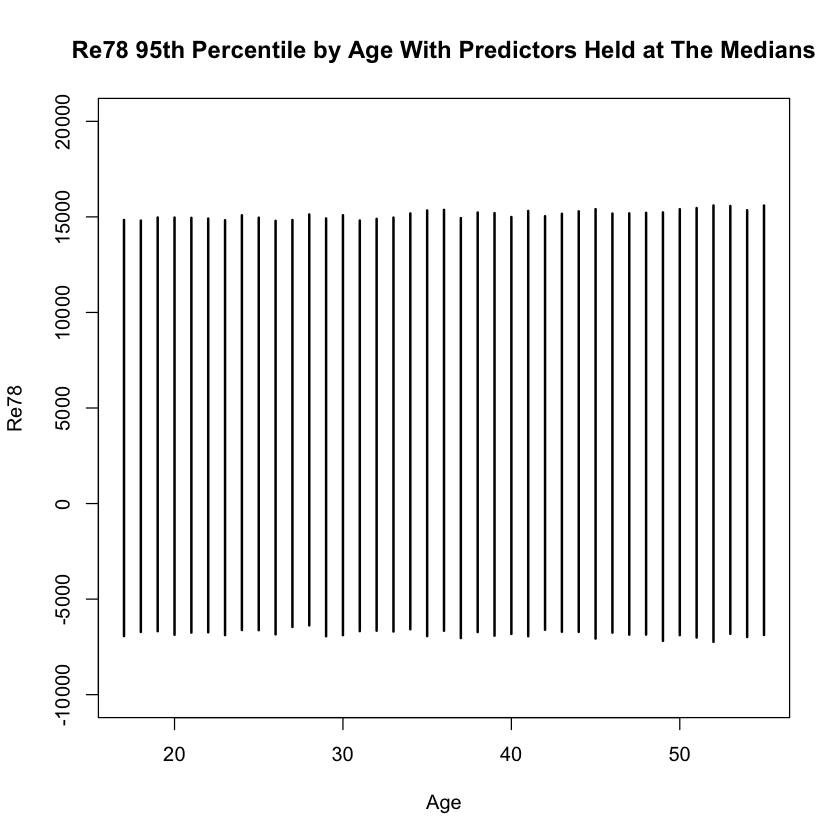

In [58]:
plot(x = c(1:100), y = c(1:100), type = "n", 
     xlim = c(17,55), 
     ylim = c(-10000,20000), 
     main = "Re78 95th Percentile by Age With Predictors Held at The Medians", xlab = "Age", 
     ylab = "Re78")

for (age in min(new_lalonde$age):max(new_lalonde$age)) {
  segments(
    x0 = age,
    y0 = median_confint[1, age - min(new_lalonde$age) + 1],
    x1 = age,
    y1 = median_confint[2, age - min(new_lalonde$age) + 1],
    lwd = 2)
}

**Part D**

In [59]:
simulated.ys_q75 <- matrix(NA, nrow = 10000, ncol = 39)

In [67]:
educ_q75 <- quantile(new_lalonde$educ, 0.75)
re74_q75 <- quantile(new_lalonde$re74, 0.75)
re75_q75 <- quantile(new_lalonde$re75, 0.75)

for (age in (17:55)) {
  Xs_q75 <- c(1, age, educ_q75, re74_q75, re75_q75, educ_q75*re74_q75,
          educ_q75*re75_q75, age*re74_q75, age*re75_q75, re74_q75*re75_q75)
  for (i in 1:10000) {
    simulated.ys_q75[i, age + 1 - min(new_lalonde$age)] <- sum(Xs_q75*simulation_lalonde@coef[i,]) +
            rnorm(1, 0, simulation_lalonde@sigma[i])
  }
}

storage_4 <- 0
for (age in 1:39) {
    storage_4[age] <- median(simulated.ys_q75[age, ])
    }

coinfint_q75 <- apply(simulated.ys_q75, MARGIN = 2, quantile, probs = c(0.025, 0.975))
table_q75 <- data.frame("Age"= 17:55, "Median" = storage_4, "Lower Quartile" = coinfint_q75[1, ], "Upper Quartile" = coinfint_q75[2, ])
table_q75



Age,Median,Lower.Quartile,Upper.Quartile
17,5588.0732,-6776.858,15121.47
18,5191.6143,-6600.940,15400.65
19,3851.1983,-6677.604,15373.97
20,5331.2648,-6478.216,14853.47
21,5729.7570,-6666.583,15292.78
22,3492.7973,-6244.768,15106.49
23,3919.9962,-6731.435,15182.76
24,5288.5170,-6540.712,15217.09
25,3476.7884,-6726.106,14993.56
26,5689.1091,-6512.992,15255.39


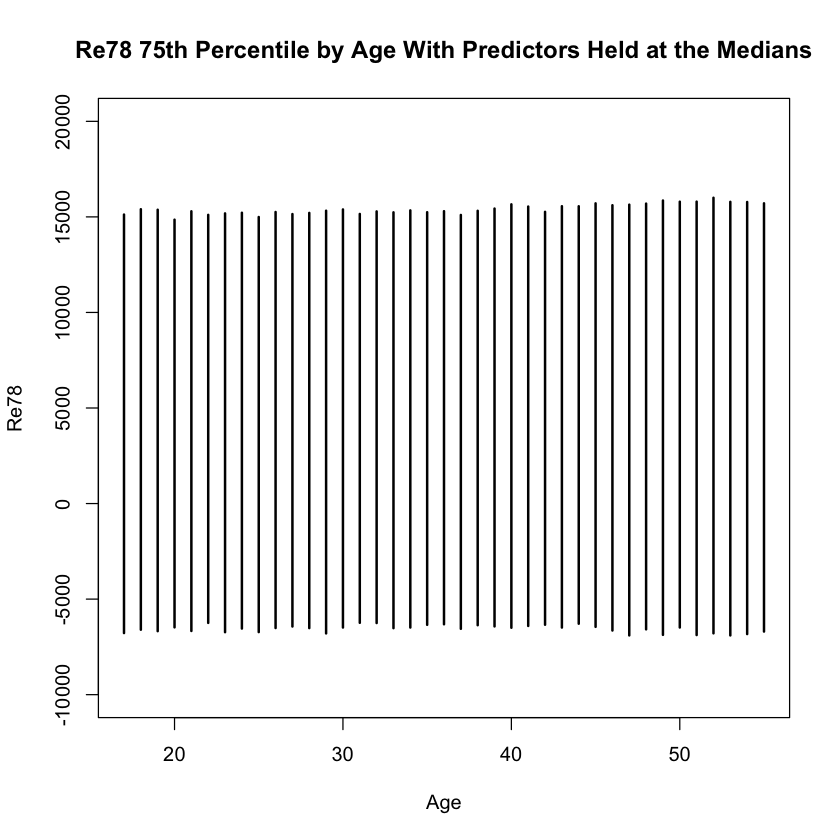

In [68]:
plot(x = c(1:100), y = c(1:100), type = "n", 
     xlim = c(17,55), 
     ylim = c(-10000,20000), 
     main = "Re78 75th Percentile by Age With Predictors Held at the Medians", xlab = "Age", 
     ylab = "Re78")

for (age in min(new_lalonde$age):max(new_lalonde$age)) {
  segments(
    x0 = age,
    y0 = coinfint_q75[1, age - min(new_lalonde$age) + 1],
    x1 = age,
    y1 = coinfint_q75[2, age - min(new_lalonde$age) + 1],
    lwd = 2)
}

**Question 3**

In [37]:
library(Matching)
data("PlantGrowth")
treatment <- PlantGrowth[which(PlantGrowth$group == "trt1"), ]
control <- PlantGrowth[which(PlantGrowth$group == "ctrl"), ]
levels(PlantGrowth$group) <- c(0,1,2)
plantgrowth_factor <- PlantGrowth[PlantGrowth$group!="2", ]
plantgrowth_factor$group <- as.numeric(as.character(plantgrowth_factor$group))
lm_plantgrowth <- lm(group~weight, data = plantgrowth_factor)
head(plantgrowth_factor)

weight,group
4.17,0
5.58,0
5.18,0
6.11,0
4.50,0
4.61,0


In [22]:
simulated = 10000
results <- rep(NA, simulated)
for(i in 1:simulated)
    {
  temp_lm =  lm(group~weight, data = plantgrowth_factor[sample(1:nrow(plantgrowth_factor), nrow(plantgrowth_factor), replace = T),]) 
    results[i] <- temp_lm$coefficients[2]
    }

2.5%      97.5% 
-0.5483198  0.1355345

2.5 %     97.5 % 
-0.5443617  0.1504124


Call:
lm(formula = group ~ weight, data = plantgrowth_factor)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63325 -0.43776  0.00069  0.42781  0.73312 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   1.4546     0.8094   1.797   0.0891 .
weight       -0.1970     0.1653  -1.191   0.2490  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5074 on 18 degrees of freedom
Multiple R-squared:  0.07308,	Adjusted R-squared:  0.02158 
F-statistic: 1.419 on 1 and 18 DF,  p-value: 0.249


,simulated,analytical
2.5%,-0.5483198,-0.5443617
97.5%,0.1355345,0.1504124


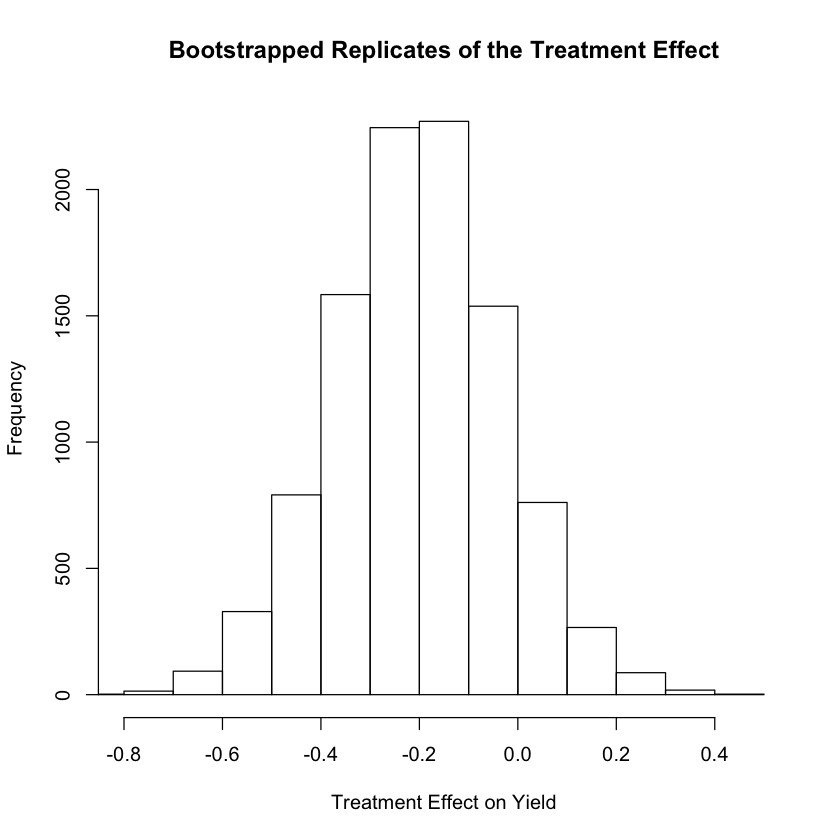

In [79]:
quantile(results, c(0.025, 0.975))
lm_plantgrowth2 <- lm(group~weight, data = plantgrowth_factor)
confint(lm_plantgrowth2)[2, ]
summary(lm_plantgrowth2)
data.frame(simulated = quantile(results, c(0.025, 0.975)), analytical = confint(lm_plantgrowth2)[2, ])
hist(results, main = "Bootstrapped Replicates of the Treatment Effect", 
     xlab = "Treatment Effect on Yield", xlim = c(-0.8,0.5))

**Question 4**

In [253]:
r_squared <- function(actual_y, predicted_y) 
    {
  RSS <- sum((actual_y - predicted_y)**2)
  TSS <- sum((actual_y - mean(actual_y))**2)
  return(cor(actual_y, predicted_y)**2)
    }
lm_plantgrowth <- lm(group~weight, data = plantgrowth_new)
pred_reg <- predict(lm_plantgrowth)

rsquared_1 <- r_squared(plantgrowth_new$group,pred_reg)
rsquared_2 <- summary(lm_plantgrowth)$r.squared

rsquared_1
rsquared_2

[1] 0.0730776

[1] 0.0730776

**Question 5**

In [45]:
library(foreign)
nsw_lalonde <- read.dta("http://www.nber.org/~rdehejia/data/nsw.dta")
#to remove data_id column
nsw_lalonde <- nsw_lalonde[,-1]
length(which(nsw_lalonde$treat == 1))
length(which(nsw_lalonde$treat == 0))
propensity_score <- glm(treat ~ . - re78, data = nsw_lalonde, family=binomial)
prob_treat <- propensity_score$fitted[which(nsw_lalonde$treat == 1)]
prob_control <- propensity_score$fitted[which(nsw_lalonde$treat == 0)]
summary(propensity_score)

[1] 297

[1] 425


Call:
glm(formula = treat ~ . - re78, family = binomial, data = nsw_lalonde)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2318  -0.9981  -0.9696   1.3521   1.4851  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)  4.343e-01  8.599e-01   0.505   0.6135  
age         -1.624e-03  1.204e-02  -0.135   0.8927  
education   -2.378e-02  5.966e-02  -0.399   0.6901  
black       -9.743e-02  2.635e-01  -0.370   0.7116  
hispanic    -2.525e-01  3.481e-01  -0.725   0.4682  
married      9.292e-02  2.158e-01   0.431   0.6668  
nodegree    -5.292e-01  2.443e-01  -2.167   0.0303 *
re75        -3.121e-06  1.550e-05  -0.201   0.8404  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 978.09  on 721  degrees of freedom
Residual deviance: 970.25  on 714  degrees of freedom
AIC: 986.25

Number of Fisher Scoring iterations: 4


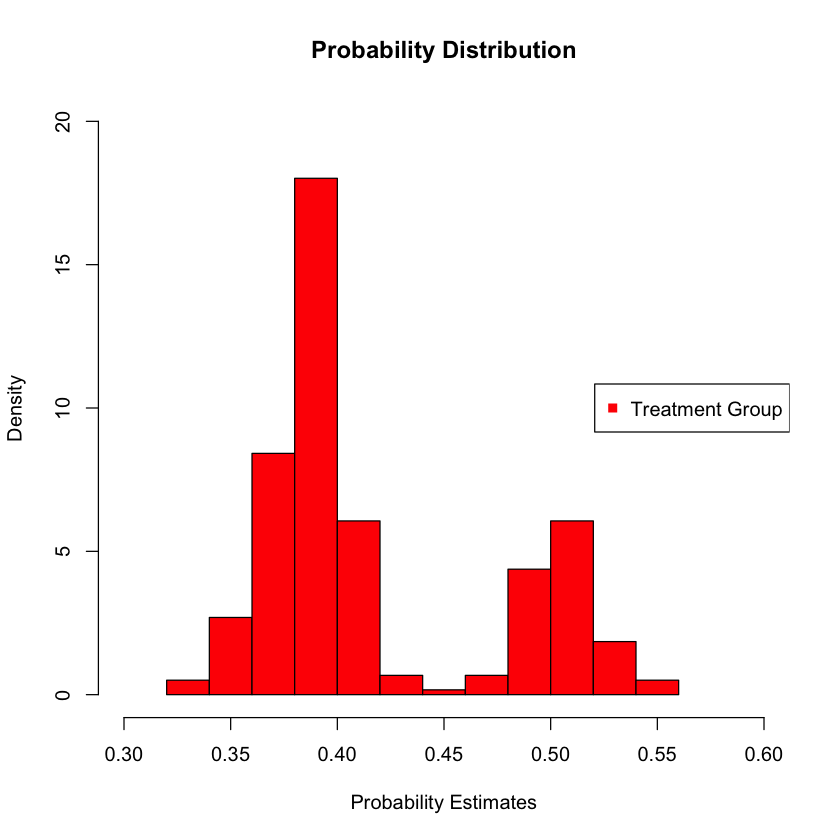

In [43]:
hist(prob_treat,
     main="Probability Distribution",
     xlab="Probability Estimates", 
     xlim = c(0.3,0.6),
     ylim = c(0,20),
     col="red",
     freq=FALSE)

legend("right", legend=c("Treatment Group"), 
       col=c("red"), pch=15, cex=1)


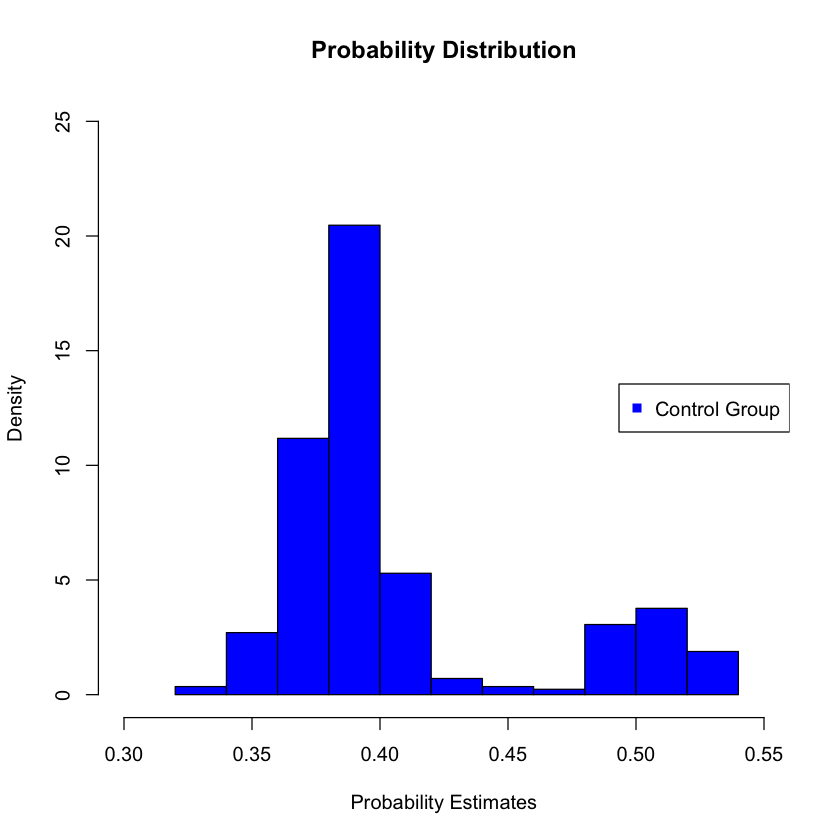

In [44]:
hist(prob_control,
     main="Probability Distribution", 
     xlab="Probability Estimates", 
     xlim = c(0.3,0.55),
     ylim = c(0,25), 
     col="blue",
     freq=FALSE)

legend("right", legend=c("Control Group"),
       col=c("blue"), pch=15, cex=1)